# **Where to hang out in Paris ?**

This notebook will provide the main results we obtained through our work. It allows anyone to use the functions without having to use the Interface.
It is divided in 3 subsequence:

I- Maps

II-Statistics

III. Scrapping (Optional)


## **I. Maps**

This section will allow you to create the Maps we create through the interface. Each cell is dedicated to a function and an example is always provided.


 The functions defined below are very similar to those defined in the mapping files of each folder. The mapping.py files are the functions we use in the interface and are programmed to open directly a window in your webbrowser with the map. The only thing we change in the following functions is that we deleted the order to open a new window with the map created. If you want to open the map, you need to go to Output/Maps and to open them in a webbrowser. JupyterLab does it by itself but some code editor as VSCODE may require an additionnal extension.

 We first import the main modules we are going to use:

In [15]:
import folium
import pandas as pd 
from folium.plugins import MarkerCluster
from datetime import datetime

### Cinema

The following sub-section gives you the code to plot the maps of all the movie displayed on a day. This uses the database DataCinema.csv created in the scrapping section. Pay attention that not all the cinemas of Paris are represented on the maps but lots of them are (additional details are provided in the code of the scrapping section). 

All the more, the database hasn't been uptated since 28 th december 2023, so the movie show on the maps are those streamed this day. If you want to have those of the current day you need to update the database through the codes in the scrapping section.


In [16]:

def HourConversion(string):                  
    return datetime.strptime(string, '%H:%M') 

def MovieMapping(data,MinHour:'HHhMM',MaxHour:'HHhMM'):     
    HeureDebut = datetime.strptime(MinHour, "%Hh%M")
    HeureFin = datetime.strptime(MaxHour, "%Hh%M")
    
    
    data['time'] = data['heure'].apply(lambda x: HourConversion(x))
    AdjustedData = data[data['time']>= HeureDebut]
    AdjustedData = AdjustedData[AdjustedData['time'] <= HeureFin]
    
    MovieMap = folium.Map(location=[48.8566, 2.3522], zoom_start=12)
    GeoVisited = {}

    for index, row in AdjustedData.iterrows():
        lat = row['geo'].split(',')[0]
        lon = row['geo'].split(',')[1]
    
        content = "<h4 style='color:black;'>" + row['nom'] + "</h4>" \
                "<p style='font-size:16px;'>" + row['etablissement'] + "</p>"\
                "<p style='font-size:16px;'>" + row['heure'] + "</p>"
        
        if (lat,lon) not in GeoVisited.keys():
            GeoVisited[(lat,lon)] = MarkerCluster().add_to(MovieMap)
            folium.Marker(location=(lat,lon), popup = content, max_width=500).add_to(GeoVisited[(lat,lon)])
        else:
            folium.Marker(location=(lat,lon), popup = content, max_width=500).add_to(GeoVisited[(lat,lon)])
    MovieMap.save("Outputs/Maps/MovieMap.html")


#### *Example*
We will use the previous function to create a map showing all the movies streamed in Paris on 28th December 2023 whose cinema sessions begins between 5:30 PM (17h30) and 10:00 PM (22h00). 

To see the final Map, open the file name MovieMap.html in Outputs/Maps though your webbrowser

In [18]:
program = pd.read_csv('Outputs/DataSets/DataCinema.csv')
MovieMapping(program,'17h30','22h00') 

### Theater

The following function creates the map of the theater play played on a given day. You can choose the day as an argument of the function. Pay attention that the database had been lastly updated on 28th December of 2023. If you use the function a longtime after this date, don't hesitate to run webscrapping codes again. 

In [20]:

def TheaterMap(data:'Pandas DataFrame',date:'YYYY-MM-DD'):

    user_date = datetime.strptime(date, '%Y-%m-%d')
    data['date début'] = pd.to_datetime(data['date début'])
    data['date fin'] = pd.to_datetime(data['date fin'])
    filtered_data = data[(data['date début'] <= user_date) & (user_date <= data['date fin'])]

    paris_coordinates = [48.8566, 2.3522]
    my_map = folium.Map(location=paris_coordinates, zoom_start=12)

    for index, row in filtered_data.iterrows():
        establishment_name = row['etablissement']
        address = row['adresse']
        show_name = row['nom']
        average_price = row['prix moyen']

        coordinates = [float(coord.strip('()')) for coord in row['Coordonnees'].split(',')]
        popup_text = f"<b>{establishment_name}</b><br>Adresse: {address}<br>Pièce: {show_name}<br>Prix moyen: {average_price} €"
        folium.Marker(location=coordinates, popup=popup_text).add_to(my_map)
    
    my_map.save("Outputs/Maps/Theatermap.html")


#### *Example*
We create a Map with all the theaters plays play on 12th January of 2024. If you want to create a map for an other date pay attention to the format of the date that has to be 'YYYY-MM-DD'.
To see the map, open TheaterMap.html in the Outputs/Maps section.

In [21]:
DataTheater = pd.read_csv('Outputs/DataSets/DataTheatre_base_finale.csv', sep=';')
TheaterMap(DataTheater,'2024-01-12' )

### Concerts

Here are provided the functions used to make a map of concerts play on a given day in Paris.


In [22]:
def ClassicalMap(data:'Pandas DataFrame',date:'YYYY-MM-DD'):
    user_date = datetime.strptime(date, '%Y-%m-%d')
    data['date datetime'] = pd.to_datetime(data['date datetime'])
    
    data['date datetime'] = data['date datetime'].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
    user_date = user_date.replace(hour=0, minute=0, second=0, microsecond=0)    
    filtered_data = data[(data['date datetime'] == user_date)]
    paris_coordinates = [48.8566, 2.3522]
    my_map = folium.Map(location=paris_coordinates, zoom_start=12)

    for index, row in filtered_data.iterrows():
        establishment_name = row['etablissement']
        address = row['adresse']
        show_name = row['nom']
        average_price = row['prix moyen']
        time = row['heure']
        
        coordinates = [float(coord.strip('()')) for coord in row['coordonnees'].split(',')]

        popup_text = f"<b>{establishment_name}</b><br>Adresse: {address}<br>Concert: {show_name}<br>Heure: {time}<br>Prix moyen: {average_price} €"
        folium.Marker(location=coordinates, popup=popup_text).add_to(my_map)
    
    my_map.save("Outputs/Maps/Classicmap.html")

#### *Example*

We plot a map with all the concert played on 29th december of 2023 in Paris

In [23]:
DataClassical = pd.read_csv('Outputs/DataSets/DataMusiqueClassique_v8.csv', sep=',')
ClassicalMap(DataClassical,'2023-12-29')

## **II. Statistics** 

In this section we review the main statistics we realised with the databases we produced in the first section.
We will go through various topics such as finding the most relevant place for you to hang out in Paris, according to your tastes.


### Cinema
This section will contain statistics made from the databases we created or found. For the cinemas I will use the Open database from the City of Paris about cinemas of the town. The database issued by webscrapping only contains data about one day so it's hard to make statistics from it. 

The original file is located in Resources/Data and is named ListeCinema.csv.
We first read the file trough pandas and import the necessary modules :



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [25]:
DataCinemaParis = pd.read_csv('Ressources/Data/ListeCinema.csv', sep = ';')
DataCinemaParis = DataCinemaParis[DataCinemaParis['dep'] == 75]
DataCinemaParis.head()

,ndeg_auto,dep,nom,region_administrative,adresse,code_insee,commune,situation_geographique,ecrans,fauteuils,...,nombre_de_films_inedits_2020,nombre_de_films_en_semaine_1_2020,pdm_en_entrees_des_films_francais_2020,pdm_en_entrees_des_films_americains_2020,pdm_en_entrees_des_films_europeens_2020,pdm_en_entrees_des_autres_films_2020,films_art_et_essai_2020,part_des_seances_de_films_art_et_essai_2020,pdm_en_entrees_des_films_art_et_essai_2020,geo
0,12.0,75,UGC GEORGE V,ILE-DE-FRANCE,146 AVENUE DES CHAMPS ELYSEES,75108,Paris 8e Arrondissement,01-Paris,11,1666,...,44.0,39.0,37.987231,46.459221,13.965355,1.588193,37.0,30.101331,29.111174,"48.873073,2.298394"
1,31.0,75,UGC NORMANDIE,ILE-DE-FRANCE,116 AVENUE DES CHAMPS ELYSEES,75108,Paris 8e Arrondissement,01-Paris,4,1610,...,47.0,39.0,41.135925,35.974635,19.163220,3.726220,43.0,57.619048,52.794320,"48.872265,2.300938"
2,35.0,75,BALZAC,ILE-DE-FRANCE,1 RUE BALZAC,75108,Paris 8e Arrondissement,01-Paris,3,589,...,43.0,28.0,61.031576,3.964856,19.594595,15.408973,76.0,82.796149,81.268397,"48.872431,2.299525"
3,54.0,75,GAUMONT CHAMPS ELYSEES MARIGNAN,ILE-DE-FRANCE,27/33 AVENUE DES CHAMPS ELYSEES,75108,Paris 8e Arrondissement,01-Paris,6,1597,...,65.0,61.0,24.273704,59.361645,14.711067,1.653584,24.0,23.609811,22.008902,"48.869654,2.306873"
4,55.0,75,ELYSEES LINCOLN,ILE-DE-FRANCE,14 RUE LINCOLN,75108,Paris 8e Arrondissement,01-Paris,3,448,...,59.0,53.0,48.828477,5.617302,26.364274,19.189947,61.0,88.657914,87.628918,"48.870512,2.303157"


#### Wich part of the city has better facilities for Cinema lovers ?
This section deals with general statistics on cinemas in Paris such as the nulber of cinema, the number of screen or seat per district. This allows us to find the part of the town that has more facilities on Cinema.

In [26]:
DataCinemaParis.shape

(78, 37)

In [27]:
print(DataCinemaParis['ecrans'].mean())
print(DataCinemaParis['fauteuils'].mean())

5.128205128205129
906.4102564102565


In [28]:
MeanSeats = DataCinemaParis.groupby('commune')['fauteuils'].mean()
MeanScreen = DataCinemaParis.groupby('commune')['ecrans'].mean()
print(MeanSeats, MeanScreen)


commune
Paris 10e Arrondissement     299.666667
Paris 11e Arrondissement     416.000000
Paris 12e Arrondissement    2088.333333
Paris 13e Arrondissement    1116.800000
Paris 14e Arrondissement     980.333333
Paris 15e Arrondissement    1542.750000
Paris 16e Arrondissement     617.000000
Paris 17e Arrondissement     538.200000
Paris 18e Arrondissement    1124.500000
Paris 19e Arrondissement    1947.750000
Paris 1er Arrondissement    3894.000000
Paris 20e Arrondissement    1267.000000
Paris 2e Arrondissement     2706.000000
Paris 3e Arrondissement      557.000000
Paris 4e Arrondissement      238.000000
Paris 5e Arrondissement      209.100000
Paris 6e Arrondissement      540.133333
Paris 8e Arrondissement      946.142857
Paris 9e Arrondissement      617.333333
Name: fauteuils, dtype: float64 commune
Paris 10e Arrondissement     2.333333
Paris 11e Arrondissement     3.000000
Paris 12e Arrondissement    10.333333
Paris 13e Arrondissement     7.600000
Paris 14e Arrondissement     6.333333
Pa

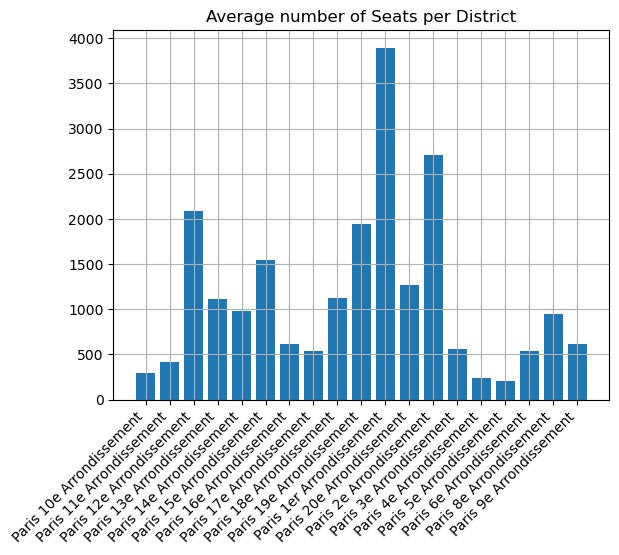

In [29]:
plt.bar(MeanSeats.index, MeanSeats)
plt.xticks(rotation = 45, ha='right')
plt.grid()
plt.title('Average number of Seats per District')
plt.show()

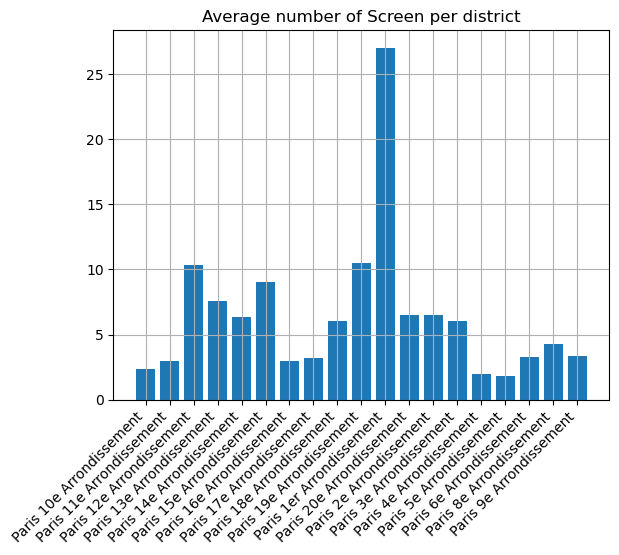

In [30]:
plt.bar(MeanScreen.index, MeanScreen)
plt.xticks(rotation = 45, ha='right')
plt.grid()
plt.title('Average number of Screen per district')
plt.show()

Those results seem to show us that the first district of Paris is the one with the more facilities if you like big cinemas. However those results are mostly due to the 'UGC Chatelet les halles' that has 27 rooms ! The other cinemas of the Paris 1er Arrondissement are way smaller than this one. The 2nd Arrondissement also has a high number of seats due to 'Le Grand  Rex' and its 14 rooms. If you like huge cinemas with a tremendous number of facilities, those arrondissements are the one you need to get to !

#### What kind cinema do you find in different districts ?

In [31]:
print(DataCinemaParis.keys())

Index(['ndeg_auto', 'dep', 'nom', 'region_administrative', 'adresse',
       'code_insee', 'commune', 'situation_geographique', 'ecrans',
       'fauteuils', 'tranche_d_entrees', 'proprietaire', 'programmateur',
       'categorie_art_et_essai', 'label_art_et_essai', 'genre', 'multiplexe',
       'population_de_la_commune_2015', 'unite_urbaine_2010',
       'population_unite_urbaine_2015', 'semaines_d_activite_2020',
       'seances_2020', 'entrees_2020', 'entrees_2019',
       'evolution_entrees_2020_2019', 'art_et_essai',
       'nombre_de_films_programmes_2020', 'nombre_de_films_inedits_2020',
       'nombre_de_films_en_semaine_1_2020',
       'pdm_en_entrees_des_films_francais_2020',
       'pdm_en_entrees_des_films_americains_2020',
       'pdm_en_entrees_des_films_europeens_2020',
       'pdm_en_entrees_des_autres_films_2020', 'films_art_et_essai_2020',
       'part_des_seances_de_films_art_et_essai_2020',
       'pdm_en_entrees_des_films_art_et_essai_2020', 'geo'],
      dtype='o

In [56]:
FrenchMovie = DataCinemaParis.groupby('commune')['pdm_en_entrees_des_films_francais_2020'].mean()
print(FrenchMovie)

commune
Paris 10e Arrondissement    49.876972
Paris 11e Arrondissement    54.494130
Paris 12e Arrondissement    46.212740
Paris 13e Arrondissement    47.368508
Paris 14e Arrondissement    52.299938
Paris 15e Arrondissement    43.335309
Paris 16e Arrondissement    50.828104
Paris 17e Arrondissement    46.203511
Paris 18e Arrondissement    45.415024
Paris 19e Arrondissement    40.781526
Paris 1er Arrondissement    38.955951
Paris 20e Arrondissement    43.005345
Paris 2e Arrondissement     26.556997
Paris 3e Arrondissement     55.864979
Paris 4e Arrondissement     38.120070
Paris 5e Arrondissement     42.248007
Paris 6e Arrondissement     47.158843
Paris 8e Arrondissement     46.993894
Paris 9e Arrondissement     39.593567
Name: pdm_en_entrees_des_films_francais_2020, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Paris 10e Arrondissement'),
  Text(1, 0, 'Paris 11e Arrondissement'),
  Text(2, 0, 'Paris 12e Arrondissement'),
  Text(3, 0, 'Paris 13e Arrondissement'),
  Text(4, 0, 'Paris 14e Arrondissement'),
  Text(5, 0, 'Paris 15e Arrondissement'),
  Text(6, 0, 'Paris 16e Arrondissement'),
  Text(7, 0, 'Paris 17e Arrondissement'),
  Text(8, 0, 'Paris 18e Arrondissement'),
  Text(9, 0, 'Paris 19e Arrondissement'),
  Text(10, 0, 'Paris 1er Arrondissement'),
  Text(11, 0, 'Paris 20e Arrondissement'),
  Text(12, 0, 'Paris 2e Arrondissement'),
  Text(13, 0, 'Paris 3e Arrondissement'),
  Text(14, 0, 'Paris 4e Arrondissement'),
  Text(15, 0, 'Paris 5e Arrondissement'),
  Text(16, 0, 'Paris 6e Arrondissement'),
  Text(17, 0, 'Paris 8e Arrondissement'),
  Text(18, 0, 'Paris 9e Arrondissement')])

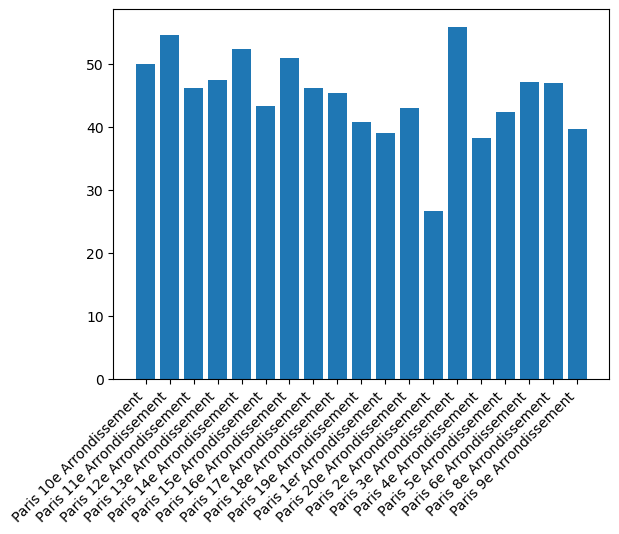

In [59]:
plt.bar(FrenchMovie.index, FrenchMovie)
plt.xticks(rotation = 45, ha='right')

In [57]:
b = DataCinemaParis.groupby('commune')['pdm_en_entrees_des_films_americains_2020'].mean()
print(b)

commune
Paris 10e Arrondissement    17.842129
Paris 11e Arrondissement    19.123246
Paris 12e Arrondissement    40.084963
Paris 13e Arrondissement    29.139295
Paris 14e Arrondissement    27.003941
Paris 15e Arrondissement    38.436939
Paris 16e Arrondissement    39.261720
Paris 17e Arrondissement    29.101714
Paris 18e Arrondissement    37.976307
Paris 19e Arrondissement    39.588999
Paris 1er Arrondissement    37.701346
Paris 20e Arrondissement    41.792659
Paris 2e Arrondissement     46.763038
Paris 3e Arrondissement     13.717768
Paris 4e Arrondissement     18.855408
Paris 5e Arrondissement     25.535445
Paris 6e Arrondissement     26.107333
Paris 8e Arrondissement     28.910419
Paris 9e Arrondissement     34.993326
Name: pdm_en_entrees_des_films_americains_2020, dtype: float64


#### Theater

In [ ]:
df = pd.read_csv('/home/onyxia/work/Maps_cultural_life_Paris/Outputs/DataSets/DataTheatre_base_finale.csv', sep=';')

We are looking for the number of plays per district

This first step helps us understand the cultural activity you will find in each district of Paris


In [ ]:
result_df = df.groupby('commune')['etablissement'].count().reset_index()
result_df = result_df.rename(columns={'etablissement': 'nombre_de_pieces'})
print(result_df)

In [ ]:
result_df['arrondissement'] = result_df['commune'].str.extract('(\d+)', expand=False).astype(int)
df_classe = result_df.sort_values(by='arrondissement')
print(df_classe)

In [ ]:
fig, ax = plt.subplots(figsize=(20, max(6, len(result_df) * 0.3)))
ax.bar(result_df['commune'], result_df['nombre_de_pieces'], color='blue')
ax.set_title('Nombre de pièces par quartier')
plt.tight_layout()
plt.show()

We are looking for the number of plays per theatre.

In this second step, we extract the number of different plays each theater will propose from now on until the end of the season (june) 

In [ ]:
df_pieces_par_etablissement = df.groupby('etablissement')['nom'].count().reset_index()
df_pieces_par_etablissement = df_pieces_par_etablissement.rename(columns={'nom': 'nombre_de_pieces'})
print(df_pieces_par_etablissement)

We are looking for the mean price per quarter

In [ ]:

df['prix moyen'] = df['prix moyen'].astype(str)
df['prix moyen'] = pd.to_numeric(df['prix moyen'].str.extract('(\d+)')[0], errors='coerce')
df['prix moyen'] = df['prix moyen'].round(1)
df_prix_moyen = df.groupby('commune')['prix moyen'].mean().reset_index()
print(df_prix_moyen)

In [ ]:
df_prix_moyen['arrondissement'] = df_prix_moyen['commune'].str.extract('(\d+)', expand=False).astype(int)
df_ordonne = df_prix_moyen.sort_values(by='arrondissement')
print(df_ordonne)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We will have a closer look at Paris's district to test if their level of wealth has a significant impact on the price of theatre's tickets

At first sight, it seems logicial that the more wealthy a quarter is, the higher prices will be. But how to measure it effectively ? In fact, it is difficult to measure quarter's wealth. We decided to use a simple indicator: the price of a square meter in every quarter assuming that the higher it is, the higher the purchasing power of its inhabitant will be.

First step: we scraped a website with the 2023-data and saved them in the 'Prixm2' csv file

In [ ]:
import bs4
import lxml
import pandas as pd
import urllib
from bs4 import BeautifulSoup
from urllib import request
import numpy as np

In [ ]:
url = 'https://www.journaldunet.com/patrimoine/prix-immobilier/paris/ville-75056'
request_text = request.urlopen(url).read()
page = bs4.BeautifulSoup(request_text, 'html.parser')

In [ ]:
rows = page.find_all('tr')
informations = []

for row in rows:
    link = row.find('a')
    columns = row.find_all('td')
    if link and len(columns) > 1:
        arrondissement = link.text.strip()
        prix = columns[1].text.strip()
        informations.append({'arrondissement': arrondissement, 'prix': prix})

df2 = pd.DataFrame(informations)

df2['prix'] = df2['prix'].str.replace('\D', '', regex=True).astype(int) #removes all the non-numerical (but keeps the 2 of the m2) 
df2['prix'] = df2['prix'].astype(str).str[:-1].astype(int) #removes the last figure of our number (here the 2 from 'm2')

df2.to_csv('Prixm2.csv', index = False)

In [ ]:
# Regression of the price of the ticket on the price of the square meter


In [ ]:
X=df2['prix']
y = df_ordonne['prix moyen']
X = X.values.reshape(-1, 1)
model1 = LinearRegression()
model1.fit(X,y)
y_pred = model1.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=1.5)
plt.xlabel('Prix du m2 dans l arrondissement')
plt.ylabel('Prix du billet')
plt.show()

In [ ]:
print("Pente :", model1.coef_)
print("Fixe :", model1.intercept_)

Some conclusions:

1- our initial intuition seems to be right: the higher the square meter costs, the higher the ticket price is. 

2- Except for one point, results are well shared

3- Some biais: our sample of prices is made of approximation or mean + we didn't take into account all the plays for which we didn't have the price + we assume that we are lacking of data for some theatre we decided not to include in this set (theatre for which the website we scrapped had no information).

In [ ]:
A = df_classe['nombre_de_pieces']
b = df_ordonne['prix moyen']
A= A.values.reshape(-1, 1)
model2 = LinearRegression()
model2.fit(A,b)
b_pred = model2.predict(A)
plt.scatter(A, b)
plt.plot(A, b_pred, color='yellow', linewidth=1.5)
plt.xlabel('Nombre de pieces dans le quartier')
plt.ylabel('Prix du billet')
plt.show()

In [ ]:
print("Pente :", model2.coef_)
print("Fixe :", model2.intercept_)

Some conclusions: 

1- Here we have an interesant result: the higher plays you have in the same quarter, the lower the price of the ticket will be, which means that there is some kind of competition you could take advantage of when choosing your play and the range of price you are willing to pay. 

### Concerts

## **III. Scrapping** 

We collected most of our Data using webscrapping. We used BeautifulSoup4 to webscrap the most relevant sites for our project. An error may occur while running the algorithm or some cell may take lots of time to run due to long API request. We don't recommend you to run it, except if you want to try to update the Databases that are stored in the Output sections.
You can find all our scrapping codes in the folders dedicated to each kind of activities we were looking for. 
We only used in this project data collected by scrapping and cleaned !
